### CSI-674<br>Jericho McLeod<br>Assignment 3


#### Problem  1

<b>Part A:</b> A common model for interarrival times is a random sample from an exponential distribution. Do you think an exponential distribution provides a good model for the interarrival times? Justify your answer.

Yes, an exponential distribution randomly sampled is a good model for interarrival times. The Poisson distributions are exponential family distributions and are adequately represented by exponential models when randomly sampled in this fashion.

To demonstrate this for the provided data, see the chart below visualizing the fit.

In [2]:
import random
import copy
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import poisson

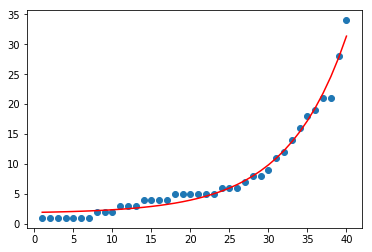

In [3]:
# Setting  up  variables  and inputting data
times = np.array([12, 2, 6, 2, 19, 5, 34, 4, 1, 4, 8, 7, 1, 21, 6, 11, \
         8, 28, 6, 4, 5, 1, 18, 9, 5, 1, 21, 1, 1, 5, 3, 14, 5, \
         3, 4, 5, 1, 3, 16, 2])
times  = sorted(times)
x      = np.linspace(1,len(times),len(times))
y      = []

# Exponential function to plot a curve relative to X after optimizing parameters to Times
def func(x, a, b, c):
    return(a * np.exp(-b * x) + c)

# Fit curve using scipy optimization library
popt, pcov = curve_fit(func, x, times,p0=(1, 1e-3, 1))

# Build curve array
for i in x:
    y.append(func(i,popt[0],popt[1],popt[2]))

# Show output
plt.scatter(x,sorted(times))
plt.plot(x,y,'r-')
plt.show()


<b>Part B:</b> When interarrival times are randomly sampled from an exponential distribution, the counts of events per unit time are a random sample from a Poisson distribution. Using a time unit of 15 seconds, find the number of cars passing in each 15-second block of time after the initial car. (The initial car is used to bound the recording interval, so the total car count in your data set should be 40.) Do you think a Poisson distribution provides a good model for the count data? Justify your answer.

In [9]:
# Input data and craete variables / data structures
times = [12, 2, 6, 2, 19, 5, 34, 4, 1, 4, 8, 7, 1, 21, 6, 11, \
         8, 28, 6, 4, 5, 1, 18, 9, 5, 1, 21, 1, 1, 5, 3, 14, 5, \
         3, 4, 5, 1, 3, 16, 2]
car_count = {}
distribution  = {}
total_time = sum(times)


# Loop through observed data, counting observations in 15-second windows
for i in range(0+1,math.ceil(total_time/15)+1):
    counter = 0
    time = 15
    while time > 0 and len(times)>0:
        if times[0]<=time:
            time -= times[0]
            del times[0]
            counter+=1
        else:
            times[0]-=time
            time = 0
    car_count[i] = counter

# Create the histogram of observations per 15 second window
dist_sum = 0
for k,v in car_count.items():
    distribution[v] = distribution.get(v,0)+1
    dist_sum +=1

# normalize and creeate lamdba vector
lam = 0
for k,v in distribution.items():
    print(k,v)
    distribution[k] = v/dist_sum
    lam += k*(v/dist_sum)
temp_array =[0]*len(distribution)
for i in range(len(temp_array)):
    temp_array[i]=lam
lam = np.array(temp_array)

pure_counts = []
for k,v in car_count.items():
    pure_counts.append(v)

print(pure_counts)
'''
# hard coded x values in vector
x = np.array([0,1,2,3,4])

### Use the probability mass function to fit the distribution over this
def dpois(x,l):
    return((lam**x * math.e**-lam)/math.factorial(x))
    #convert to  linear multiplication to avoid scalar conversion error

#Need to make inputs for DPOIS into vectors
dp = dpois(x,lam)
        

# Plot the results
plt.bar(list(distribution.keys()),list(distribution.values()))
'''

2 7
1 5
0 3
4 3
3 3
[2, 2, 1, 1, 0, 4, 3, 0, 2, 1, 1, 1, 4, 0, 2, 2, 3, 2, 4, 3, 2]


'\n# hard coded x values in vector\nx = np.array([0,1,2,3,4])\n\n### Use the probability mass function to fit the distribution over this\ndef dpois(x,l):\n    return((lam**x * math.e**-lam)/math.factorial(x))\n    #convert to  linear multiplication to avoid scalar conversion error\n\n#Need to make inputs for DPOIS into vectors\ndp = dpois(x,lam)\n        \n\n# Plot the results\nplt.bar(list(distribution.keys()),list(distribution.values()))\n'

The results resemble a poisson distribution, but the number of observations is not sufficient  to create a good poisson distribution. 

That said, we  already know that an exponential distribution deals with time between occurrences in continuous time, and that poisson distributions account for counts of continuous events in fixed windows, so we've just shown the mechanisms underlying these distributions from a single dataset manually. Any variation from a clear poisson or exponential distribution is an artifact of the limited sample size. 

<b>Part C:</b> Assume that $\Lambda$, the rate parameter of the Poisson distribution has a discrete uniform prior distribution on 20 equally spaced values between (0.2, 0.4, ..., 3.8, 4.0) cars per 15-second interval. Find the posterior distribution after observing the first 10 observations of car counts in 15 second intervals. Find the posterior mean, standard deviation, median and 95th percentile of $\Lambda$ given the first 10 observations.

Since I am using Python, I will recreate the dpois() function from R manuallly such that:
$$Pr[X=x] = \frac{e^{-\lambda}\lambda^x}{x!}$$
where  x is the observed count and lambda is the expected count.

In [322]:
prior_lambda = 0.05
t_vals = np.linspace(0.2,4,20)
x_vals = np.array([0.05]*20)
posterior_lambda = []

def dpois(x,l):
    return((x**(-l)*l**x)/math.factorial(x))
print(t)
print(x)

for i in range(len(t_vals)):
    posterior_lambda = 

[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6
 3.8 4. ]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
